# Qcodes example with Rohde Schwarz ZN20

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

from imp import reload
import qcodes as qc


In [2]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB20 as vna; reload(vna)

<module 'qcodes.instrument_drivers.rohde_schwarz.ZNB20' from '/Users/jhn/src/Qcodes/qcodes/instrument_drivers/rohde_schwarz/ZNB20.py'>

In [3]:
# v1 =vna.ZNB20('VNA', 'TCPIP0::172.20.2.234::inst0::INSTR', server_name=None)
v1 =vna.ZNB20('VNA', 'TCPIP0::192.168.15.100::inst0::INSTR', server_name=None)

1
2
3
4
Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101551, firmware:2.10) in 0.23s


In [4]:
v1.ask('CALC4:PAR:CAT?')

"'Trc4,S22'\n"

In [5]:
station = qc.Station(v1)

In [6]:
v1.parameters

{'IDN': <qcodes.instrument.parameter.StandardParameter: IDN at 4616977264>,
 'avg11': <qcodes.instrument.parameter.StandardParameter: avg11 at 4617152720>,
 'avg12': <qcodes.instrument.parameter.StandardParameter: avg12 at 4627371344>,
 'avg21': <qcodes.instrument.parameter.StandardParameter: avg21 at 4627390872>,
 'avg22': <qcodes.instrument.parameter.StandardParameter: avg22 at 4627394064>,
 'bandwidth11': <qcodes.instrument.parameter.StandardParameter: bandwidth11 at 4617152272>,
 'bandwidth12': <qcodes.instrument.parameter.StandardParameter: bandwidth12 at 4627370784>,
 'bandwidth21': <qcodes.instrument.parameter.StandardParameter: bandwidth21 at 4627373864>,
 'bandwidth22': <qcodes.instrument.parameter.StandardParameter: bandwidth22 at 4627393504>,
 'center11': <qcodes.instrument.parameter.StandardParameter: center11 at 4617153560>,
 'center12': <qcodes.instrument.parameter.StandardParameter: center12 at 4627372240>,
 'center21': <qcodes.instrument.parameter.StandardParameter: cen

In [7]:
v1.trace11()

([0.994883080464622,
  0.9931391040095283,
  0.996905045122227,
  0.9786384133401488,
  1.0027617818162764,
  1.0310496085724696,
  0.9925515317235981,
  1.0108186310605263,
  0.9925872120523569,
  0.9926692143467003],
 [0.05036939097186489,
  0.01764821060448947,
  0.011866393565832002,
  0.019511389866488284,
  0.01837896283827168,
  0.023404214898075926,
  0.00574883490212149,
  -0.013211149195320264,
  0.0023023030330283785,
  0.011257041625421755])

In [8]:
v1.start11(10e6)
v1.stop11(800e6)
v1.avg11(2)
v1.npts12(100)

In [9]:
data1 = qc.Loop(v1.power11.sweep(-15,-1,1)).each(v1.trace11).run()

Started at 2017-05-19 14:21:38
DataSet:
   location = 'data/2017-05-19/#006_{name}_14-21-38'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | VNA_power11_set | power11      | (15,)
   Setpoint | frequency_set   | frequency    | (15, 10)
   Measured | VNA_magnitude   | magnitude    | (15, 10)
   Measured | VNA_phase       | phase        | (15, 10)
Finished at 2017-05-19 14:21:38


<IPython.core.display.Javascript object>


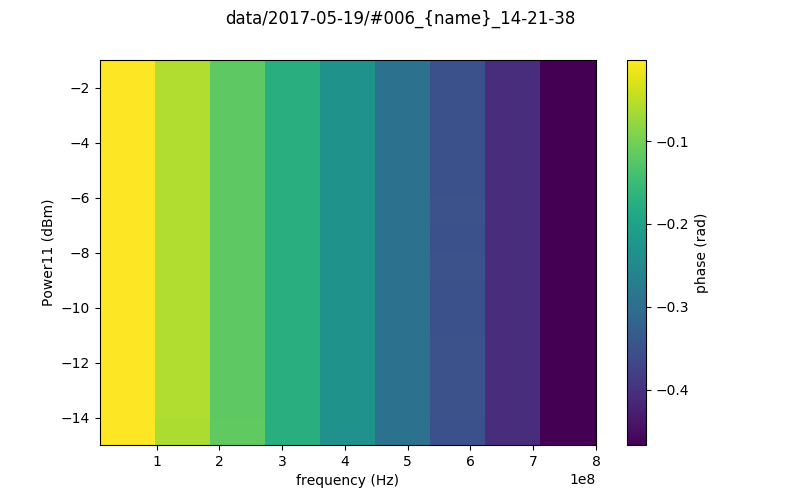

In [10]:
qc.MatPlot(data1.VNA_phase)

<IPython.core.display.Javascript object>


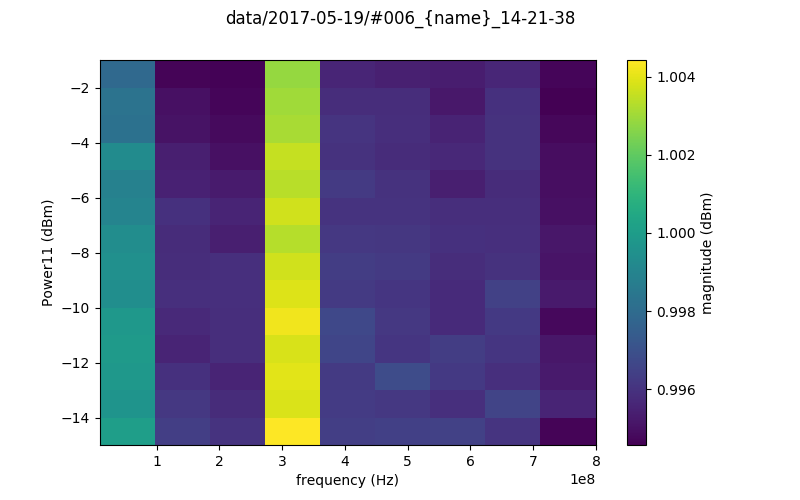

In [11]:
qc.MatPlot(data1.VNA_magnitude)

In [ ]:
qc.QtPlot(data1.VNA_magnitude)

In [39]:
v1.close()